In [1168]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil

In [1169]:
data = pd.read_csv("fods_1.csv").to_numpy()

In [1170]:
# training_data = data.sample(frac = 0.8)
# test_data = data.drop(training_data.index)
np.random.shuffle(data)
N = data.shape[0]

N_train = ceil(N * 0.8)
N_test = N - N_train

X_train = data[:N_train,0:2].T
Y_train = data[:N_train,2].T

X_test = data[N_train:,0:2].T
Y_test = data[N_train:,2].T

In [1171]:
def normalize (X):

    mean = np.array(np.mean(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])
    std = np.array(np.std(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])

    mean = np.concatenate((np.zeros([1,1]), mean), axis = 0)
    std = np.concatenate((np.ones([1,1]), std), axis = 0)

    mean = np.repeat(mean, len(X[0]), axis = 1)
    std = np.repeat(std, len(X[0]), axis = 1)

    X = (X - mean) / std

    return X


In [1172]:
def generate_feature_matrix(X, deg):

    mat = np.ones([1,len(X[0])])
    for i in range (1, deg + 1):
        for j in range(i+1):
            k = i - j
            newRow = np.array((X[0]**j) * (X[1]**k)).reshape([1, len(X[0])])
            mat = np.concatenate((mat, newRow), axis = 0)
            
    return normalize(mat)
    # return mat

In [1173]:
def loss_function(Y, X, W):
    return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))

In [1174]:
def gradient_descent(Y, X, W, alpha, iterations):
    
    N = len(X[0])
    cost = np.zeros(iterations)

    for i in range(iterations):
        W = W + (alpha / N)*(X @ (Y - W.T @ X).T)
        cost[i] = loss_function(Y, X, W)
    
    return W, cost

In [1175]:
def training_polynomial_regression(Y, X):

    error_history = np.zeros([10, 1])
    W_history = []

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        W = np.zeros([count, 1])

        iterations = 10000

        W_grad, cost_grad = gradient_descent(Y, _X, W, 0.01, iterations)
        grad_descent_graph = np.array([i for i in range (len(cost_grad))])

        title_string = "Polynomial Regression of degree " + str(i)
        rounded_cost = float("{:.4f}".format(cost_grad[len(cost_grad) - 1]))

        error_history[i][0] = rounded_cost 
        # W_history[i] = W_history[i].reshape([1, len(W_grad)])
        W_history.append(W_grad.reshape([len(W_grad)]))

        plt.plot(grad_descent_graph, cost_grad)
        plt.title(title_string)
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.text(iterations * 0.6, 10, "Final Error is " + str(rounded_cost))
        plt.show()

    return error_history, W_history

In [1176]:
def testing_polynomial_regression(Y, X, W):

    error_history = np.zeros([10, 1])

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]

        # print(type(W[i]))
        
        error_history[i][0] = loss_function(Y, _X, W[i])
    
    return error_history

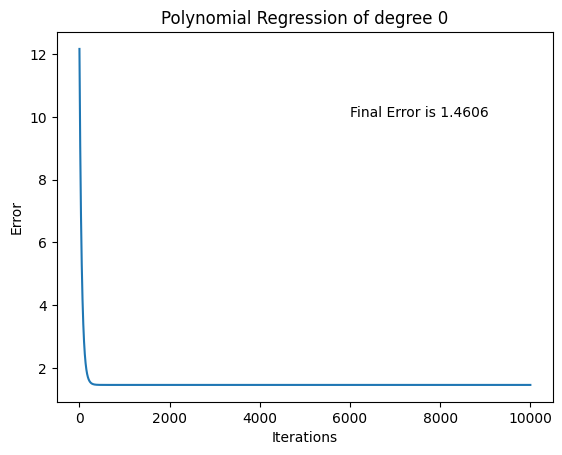

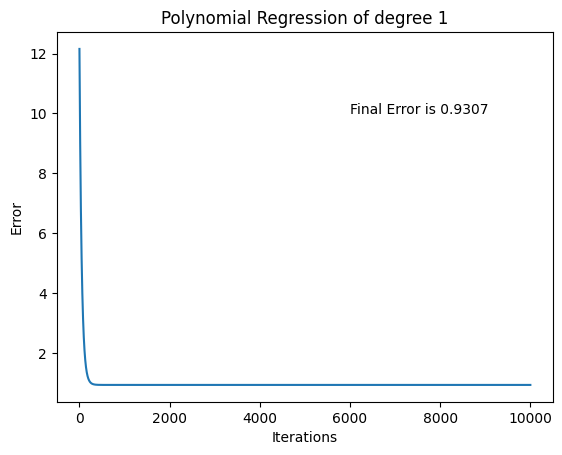

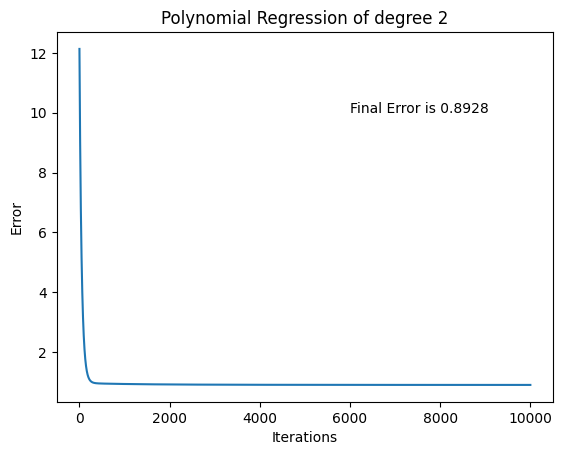

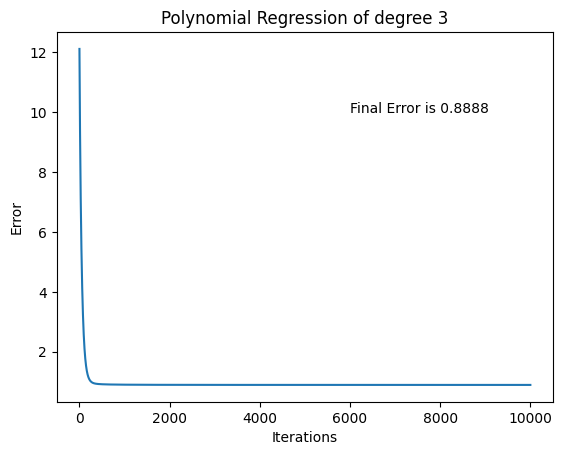

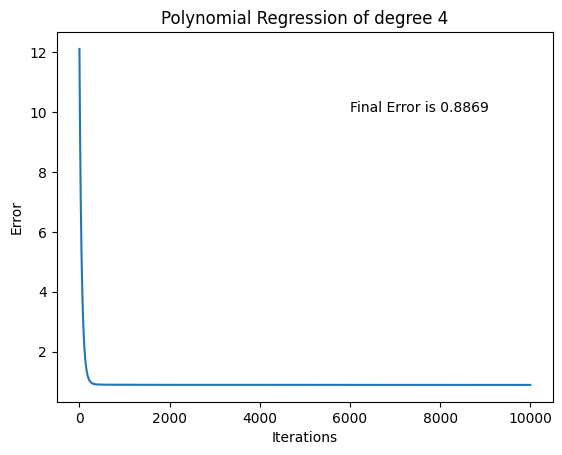

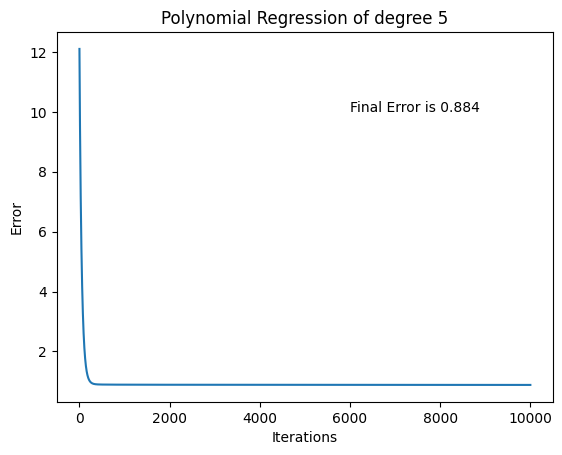

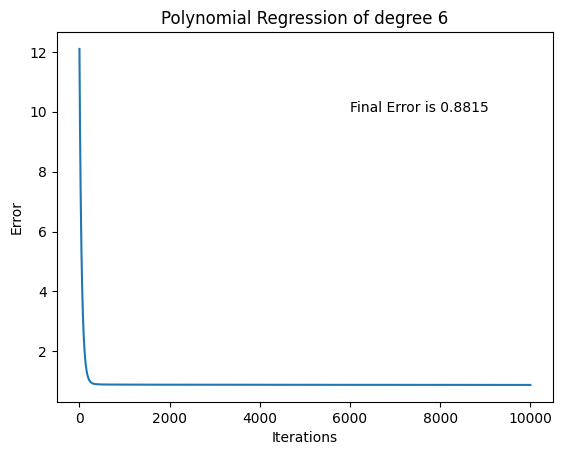

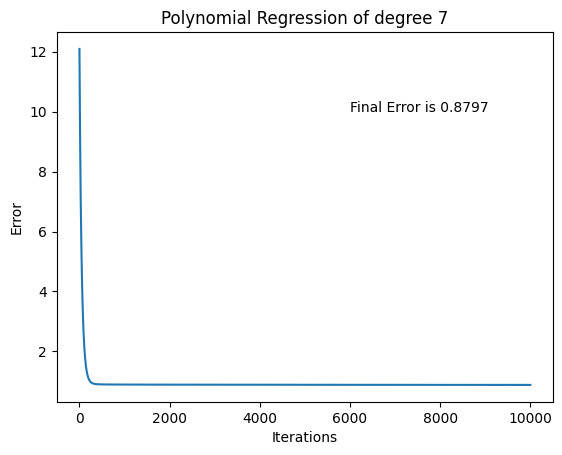

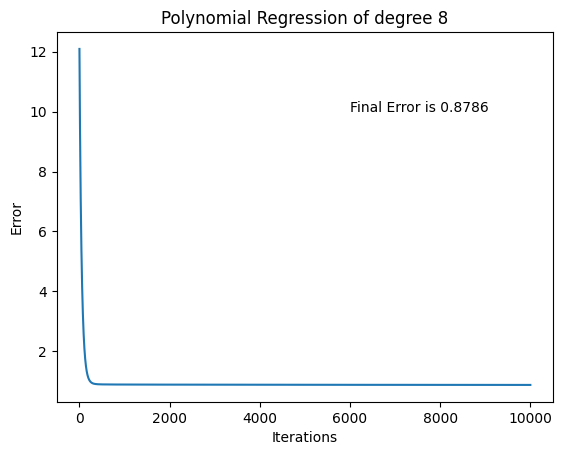

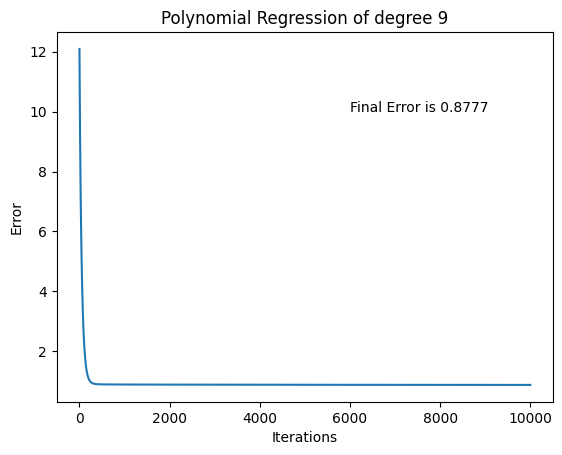

In [1177]:
X = generate_feature_matrix(X_train, 9)
training_error, W = training_polynomial_regression(Y_train, X)

In [1178]:
X = generate_feature_matrix(X_test, 9)
W = [i.reshape([len(i), 1]) for i in W]
testing_error = testing_polynomial_regression(Y_test, X, W)

In [1179]:
degrees = np.array([i for i in range(10)]).reshape([10,1])

polynomial_regression_result = np.concatenate((degrees, training_error, testing_error), axis = 1)

In [1180]:
polynomial_regression_table = pd.DataFrame(polynomial_regression_result, columns = ['Degree', 'Training Error', 'Testing Error'])
polynomial_regression_table

,Degree,Training Error,Testing Error
0,0.0,1.4606,1.077084
1,1.0,0.9307,0.885784
2,2.0,0.8928,0.864274
3,3.0,0.8888,0.853211
4,4.0,0.8869,0.860508
5,5.0,0.8840,0.866683
6,6.0,0.8815,0.871666
7,7.0,0.8797,0.877405
8,8.0,0.8786,0.883483
9,9.0,0.8777,0.890630
